# 1.1 Classification of sectors with gradient descent algorithm


## Definition of the sectors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
N = 24

# Coordinates
V = np.linspace(-2, 2, N) #Return evenly spaced 24 numbers over interval <-2,2>.
X, Y = np.meshgrid(V, V)  #Return a tuple of coordinate matrices from coordinate vectors.
Coordinates = np.vstack((X.ravel(), Y.ravel()))  #ravel - return a contiguous flattened array, vstack stacks arrays vertically

# Regions
Regions = 1 * (Y >= X) + 2 * ((Y > -X) | (np.abs(X + Y) < 1e-2)) + 1  #assigns 1,2,3,4 to regions based on Y,X values
Regions = Regions.ravel()

# Figure
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
Colors = ['m', 'g', 'c', 'y']

# Plot
for r in range(1, 5):
    I = np.where(Regions == r)
    plt.scatter(Coordinates[0, I], Coordinates[1, I], c=Colors[r-1], edgecolor='k', s=60)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## TRaining Gradient Descent

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

Coordinates = torch.tensor(Coordinates.T, dtype=torch.float32)  #making tensor from coordinates array
Regions = torch.tensor(Regions, dtype=torch.long)

# Probabilities (one-hot encoding for 4 classes)
Probabilities = torch.zeros(4, len(Regions), dtype=torch.float32)  #create tensor filled with 0;s with size of 4 x len(reigons)
for n in range(len(Regions)):
    Probabilities[Regions[n]-1, n] = 1  

# MLP
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MultiLayerPerceptron, self).__init__()
        # Define layers
        self.l1 = nn.Linear(input_size, hidden_sizes[0])
        self.l2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.out = nn.Linear(hidden_sizes[1], output_size)
        self.act = nn.Softmax(dim=1)

    def forward(self, x):
        # Forward pass through the network
        x = self.l1(x)
        x = self.l2(x)
        x = self.out(x)
        return self.act(x)

# Initialize 
mlp = MultiLayerPerceptron(input_size=2, hidden_sizes=[4, 4], output_size=4)


# Loss function and optimizer
optimizer = optim.SGD(mlp.parameters(), lr=0.01, momentum=0.9)
criterion = nn.MSELoss()


# Options
epochs = 50
min_mse = 1e-8
batch_size = 10
num_batches = len(Coordinates) // batch_size

# Training 
for epoch in range(epochs):
    for i in range(num_batches):
        # Batch sampling
        start = i * batch_size
        end = start + batch_size
        inputs = Coordinates[start:end]
        targets = Probabilities[:, start:end].T 

        # Forward pass
        outputs = mlp(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print progress
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    if loss.item() <= min_mse:
        break

print("Training complete")


In [ ]:
# Map colors
Colors = np.array([
    [1, 0, 0],  # Red
    [0, 1, 0],  # Green
    [0, 0, 1],  # Blue
    [1, 1, 0],  # Yellow
])

# Coordinates of the coloration points
N2 = 300
V = np.linspace(-2, 2, N2)
X, Y = np.meshgrid(V, V)
Coordinates2 = np.vstack((X.ravel(), Y.ravel())).T  # shape [N2*N2, 2]
Coordinates2 = torch.tensor(Coordinates2, dtype=torch.float32)

# Forward propagate to get output probabilities
with torch.no_grad():  # No need to compute gradients during prediction
    Probabilities2 = mlp(Coordinates2)
    _, Regions2 = torch.max(Probabilities2, dim=1)  # Get most probable regions

# Reshape Regions2 for plotting
Regions2 = Regions2.numpy().reshape(N2, N2)

plt.figure(figsize=(6, 6))
plt.imshow(Regions2, extent=(-2, 2, -2, 2), origin='lower', alpha=0.6)
plt.scatter(Coordinates[:, 0], Coordinates[:, 1], c=Regions, edgecolor='k')
plt.title('Final Classified Regions vs. Original Points')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

I needed to put way lower MSE or just let model run all epochs, otherwise the region wasnt accurate.

# 1.2 Classification of spirals with Levenberg-Marquardt algorithm


## Adam


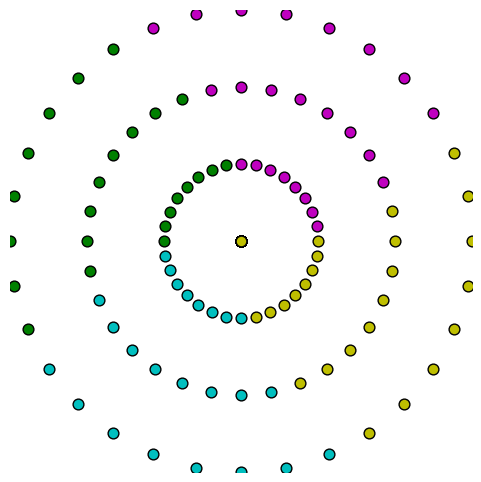

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
R = 4
k = 8
N = R
S = k * N

# Initialization
x0 = 0
y0 = 0
X = np.zeros((N, S))
Y = np.zeros((N, S))
Regions = np.zeros((N, S))

# Spirals coordinates and regions
for s in range(S):
    r = np.floor((s * R) / S).astype(int) +1
    for n in range(N):
        a0 = n / N * 2 * np.pi / k
        a = a0 + s * 2 * np.pi / S
        b = a0
        X[n, s] = b * np.cos(a) + x0
        Y[n, s] = b * np.sin(a) + y0
        Regions[n, s] = r 

# Reshape Coordinates and Regions
Coordinates = np.vstack((X.ravel(), Y.ravel()))
Regions = Regions.ravel()


# Figure
plt.figure(figsize=(6, 6))
plt.axis('off')
Colors = ['m', 'g', 'c', 'y']

# Plot points for each region
for r in range(1, R + 1):
    I = np.where(Regions == r)[0]
    plt.scatter(Coordinates[0, I], Coordinates[1, I], c=Colors[r - 1], edgecolor='k', s=60)

plt.xlim([np.min(X), np.max(X)])
plt.ylim([np.min(Y), np.max(Y)])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Adam

c:\Users\mary9\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mary9\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Epoch 1/200


c:\Users\mary9\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4078 - mean_squared_error: 0.1906  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0933 - mean_squared_error: 0.1513 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8802 - mean_squared_error: 0.1224 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6925 - mean_squared_error: 0.0908 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6916 - mean_squared_error: 0.0888 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6952 - mean_squared_error: 0.0888 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4925 - mean_squared_error: 0.0651 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7671 - mean_squared_error: 0.1024 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5455 - mean_squared_error: 0.0693 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6880 - mean_squared_error: 0.0894 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5466 - mea

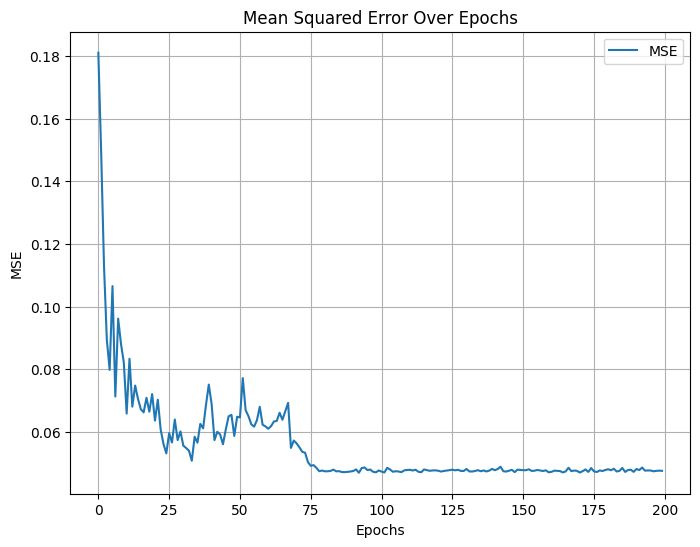

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

# Probabilities
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
Probabilities = onehot_encoder.fit_transform(Regions.reshape(-1, 1))

model=Sequential()

model.add(Dense(16, input_dim=2, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(R, activation='tanh'))
model.add(Dense(R, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['mean_squared_error'])

history = model.fit(Coordinates.T, Probabilities, epochs=200, batch_size=32)


# Plot MSE over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['mean_squared_error'], label='MSE')
plt.title('Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## Adam

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


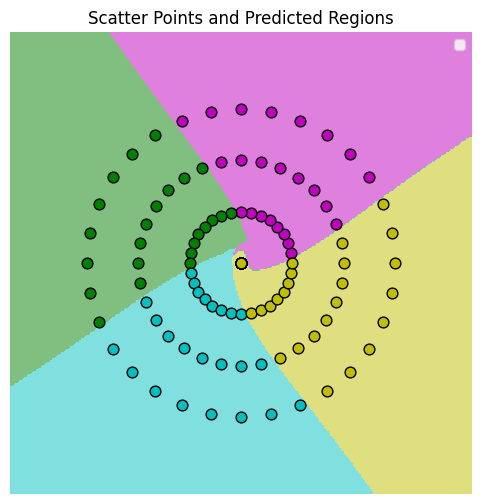

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Parameters
M = (1 + 1 / N / 2) / k * 2 * np.pi
N2 = 300
V = np.linspace(-M, +M, N2)

# Create grid of points
X, Y = np.meshgrid(V + x0, V + y0)
Coordinates2 = np.vstack((X.ravel(), Y.ravel()))

# Get the probability outputs from the MLP
Probabilities2 = model.predict(Coordinates2.T)

# Get the most probable regions (argmax)
Regions2 = np.argmax(Probabilities2, axis=1)+1

# Reshape for plotting
Regions2_reshaped = Regions2.reshape(N2, N2)

Colors = ['m', 'g', 'c', 'y']
cmap = ListedColormap(Colors)

plt.figure(figsize=(6, 6))
plt.imshow(Regions2_reshaped, extent=(np.min(X), np.max(X), np.min(Y), np.max(Y)), origin='lower', cmap=cmap, alpha=0.5)
plt.axis('off')

# Overlay scatter points with the same colors for the same class
for r in range(1, R + 1):
    I = np.where(Regions == r)[0]
    plt.scatter(Coordinates[0, I], Coordinates[1, I], c=Colors[r - 1], edgecolor='k', s=60)

plt.xlim([np.min(X), np.max(X)])
plt.ylim([np.min(Y), np.max(Y)])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Scatter Points and Predicted Regions')
plt.legend()
plt.show()


# LM


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Parameters for spiral generation
R = 4  # Number of regions
k = 8  # Spiral factor
N = R  # Number of spiral arms
S = k * N
x0, y0 = 0, 0

# Initialization
X = np.zeros((N, S))
Y = np.zeros((N, S))
Regions = np.zeros((N, S))

# Generate spiral coordinates and regions
for s in range(S):
    r = np.floor(s * R / S).astype(int) + 1  # Assign region
    for n in range(N):
        a0 = n / N * 2 * np.pi / k  # Starting angle
        a = a0 + s * 2 * np.pi / S  # Spiral angle
        b = a0  # Radius factor (spiral scaling)
        X[n, s] = b * np.cos(a) + x0
        Y[n, s] = b * np.sin(a) + y0
        Regions[n, s] = r

# Reshape coordinates and regions
Coordinates = np.vstack((X.ravel(), Y.ravel()))  # (2, S*N)
Regions = Regions.ravel()  # (S*N, )

# One-hot encode the regions to create the Probabilities (target labels)
onehot_encoder = OneHotEncoder(sparse=False)
Probabilities = onehot_encoder.fit_transform(Regions.reshape(-1, 1))


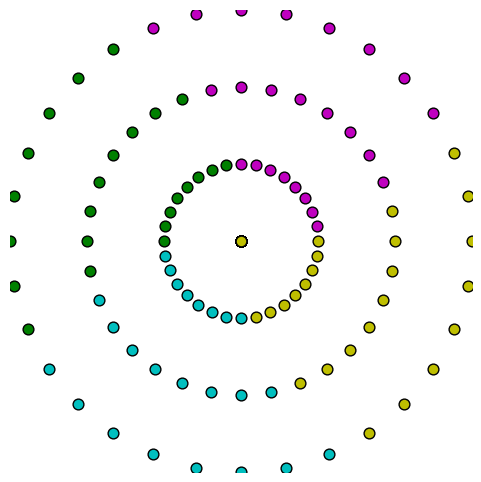

In [15]:
# Figure
plt.figure(figsize=(6, 6))
plt.axis('off')
Colors = ['m', 'g', 'c', 'y']

# Plot points for each region
for r in range(1, R + 1):
    I = np.where(Regions == r)[0]
    plt.scatter(Coordinates[0, I], Coordinates[1, I], c=Colors[r - 1], edgecolor='k', s=60)

plt.xlim([np.min(X), np.max(X)])
plt.ylim([np.min(Y), np.max(Y)])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [16]:
import numpy as np
from scipy.optimize import least_squares

def softmax(z):
    e_z = np.exp(z - np.max(z)) 
    return e_z / e_z.sum(axis=0, keepdims=True)



def mlp(weights, X, hidden_sizes):
    input_size = X.shape[0]  # Number of input features
    idx = 0
    activations = [X]

    for layer_size in hidden_sizes[:-1]:  # All layers except the last (diff activation)
        W = weights[idx:idx + input_size * layer_size].reshape(input_size, layer_size)
        idx += input_size * layer_size
        b = weights[idx:idx + layer_size].reshape(1, layer_size)
        idx += layer_size

        # Apply activation (tanh) to the current layer
        X = np.tanh(np.dot(W.T, X) + b.T)  # W.T * X + b.T cause X and W need to match in dimensions
        activations.append(X)

        input_size = layer_size

    # Last layer: output with softmax activation
    W = weights[idx:idx + input_size * hidden_sizes[-1]].reshape(input_size, hidden_sizes[-1])
    idx += input_size * hidden_sizes[-1]
    b = weights[idx:idx + hidden_sizes[-1]].reshape(1, hidden_sizes[-1])
    output_layer = np.dot(W.T, X) + b.T
    
    # Apply softmax to the output layer to make it into probabilities that sum up to 1
    final_output = softmax(output_layer)
    return final_output  



def error_function(weights, X, y, hidden_sizes):
    predictions = mlp(weights, X, hidden_sizes)  # shape: (R, N*S)
    predictions = predictions.T  

    residuals = predictions - y
    return residuals.ravel()  #flatten for least_squares


input_size = Coordinates.shape[0]  #2 input, x,y
hidden_sizes = [16, 8, R]  # Layers: 16 neurons, 8 neurons, output with R neurons
n_weights = (input_size * hidden_sizes[0] + hidden_sizes[0]) + \
            (hidden_sizes[0] * hidden_sizes[1] + hidden_sizes[1]) + \
            (hidden_sizes[1] * hidden_sizes[2] + hidden_sizes[2])
initial_weights = np.random.randn(n_weights)  # random weights at start

result = least_squares(error_function, initial_weights, args=(Coordinates, Probabilities, hidden_sizes), method='lm')

optimized_weights = result.x

print("Training completed with Levenberg-Marquardt algorithm.")

predicted_regions = np.argmax(mlp(optimized_weights, Coordinates, hidden_sizes), axis=0) + 1  # Predictions for training data
accuracy = np.mean(predicted_regions == Regions)  
print(f"Accuracy of the model: {accuracy:.2f}")


Training completed with Levenberg-Marquardt algorithm.
Accuracy of the model: 0.81


## Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


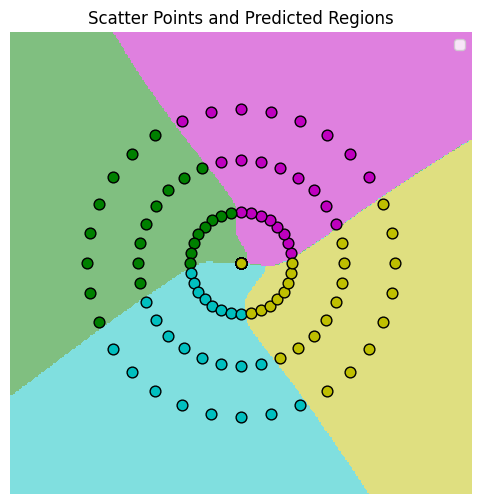

In [17]:
M = (1 + 1 / N / 2) / k * 2 * np.pi
N2=300
X, Y = np.meshgrid(np.linspace(-M, +M, N2) + x0, np.linspace(-M, +M, N2) + y0)

Coordinates2 = np.vstack((X.ravel(), Y.ravel()))  # (2, N2*N2)
Probabilities2 = mlp(optimized_weights, Coordinates2, hidden_sizes)  
Regions2 = np.argmax(Probabilities2, axis=0) + 1  # Adding 1 because regions start from 1
Regions2_reshaped = Regions2.reshape(N2, N2)

Colors = ['m', 'g', 'c', 'y']
cmap = ListedColormap(Colors) #for regions, continous

plt.figure(figsize=(6, 6))
plt.imshow(Regions2_reshaped, extent=(np.min(X), np.max(X), np.min(Y), np.max(Y)), origin='lower', cmap=cmap, alpha=0.5)
plt.axis('off')

# Overlay scatter points with the same colors for the same class
for r in range(1, R + 1):
    I = np.where(Regions == r)[0]
    plt.scatter(Coordinates[0, I], Coordinates[1, I], c=Colors[r - 1], edgecolor='k', s=60)

plt.xlim([np.min(X), np.max(X)])
plt.ylim([np.min(Y), np.max(Y)])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Scatter Points and Predicted Regions')
plt.legend()
plt.show()
